In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
%matplotlib inline

We are given the probability that a solar type start has a planet of radius $1-2 R_{\oplus}$, as well as the minimum number of similar planets we would like to detect and at what probability we want to find them, and using this we need to find the number of observations to make. This leads us to use a binomial distribution with $\rho = 0.1$, $n \ge 30$, and $N$ such that $P = 0.9$ or $0.99$.

To get the probability of finding 30 or more of these planets, we can subtract the sum of the probabilities for 0 to 29 planets from 1: $$P(n \ge 30, \rho) = 1 - \sum_{m=0}^{29} P(n=m, \rho)$$

The cumulative binomial distribution function is available as a built in function in scipy.special, so we will go ahead and use that.

In [2]:
def prob(nmin, prior, Nobs) :
    return (1. - special.bdtr(nmin-1, Nobs, prior))
n = 30
rho = 0.1

Since we want to solve for $N$ given a value of $P$, it makes more sense to define a function that takes the difference between the probability given $N$ and the desired probability and find the zeros of it. That function is defined here.

In [3]:
def probDiff(Nobs, nmin, prior, P) :
    return (prob(nmin, prior, Nobs) - P)
P1 = 0.9
P2 = 0.99

Now let's plot this difference for the two different values of $P$ to get a starting interval in which to find the zeros.

/Users/elw_accounts_access/anaconda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: floating point number truncated to an integer
  from IPython.kernel.zmq import kernelapp as app


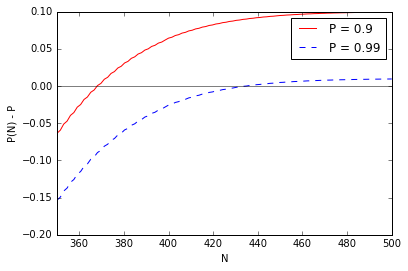

In [4]:
plt.figure(facecolor='w')
plt.xlabel('N')
plt.ylabel('P(N) - P')
plt.xlim([350, 500])
plt.plot(np.linspace(350, 500, num=100), probDiff(np.linspace(350, 500, num=100), n, rho, P1), 'r-', label='P = {}'.format(P1))
plt.plot(np.linspace(350, 500, num=100), probDiff(np.linspace(350, 500, num=100), n, rho, P2), 'b--', label='P = {}'.format(P2))
plt.plot([350, 500], [0, 0], 'k-', alpha=0.5)
plt.legend(loc=0)

So now we can see that for $P = 0.9$, the zero occurs somewhere in $360 < N < 380$ and for $P = 0.99$ the range is $420 < N < 440$. We will use these limits to bracket our root finder.

I'm going to try the false position method from Numerical Recipes (Press et al. section 9.2) to find the roots.

In [5]:
def false_pos_root(f, x1, x2, maxiter=50, tol=1e-12, *args) :
    # Make sure the function has a root in the interval
    assert f(x1, *args)*f(x2, *args) < 0.0, 'No root in given interval: f({}) = {}, f({}) = {}'.format(x1, f(x1, *args), x2, f(x2, *args))
    # Initialize the low and high x bounds, the values of the function at the bounds, and the difference in x
    if f(x1, *args) < 0.0 :
        xl = x1
        xh = x2
    else :
        xl = x2
        xh = x1
    fl = f(xl, *args)
    fh = f(xh, *args)
    dx = xh - xl
    
    # Loop to change xl and xh until convergence or maxiter is reached
    for i in range(maxiter) :
        # increment based on last values
        xnew = xl + dx*(fl/(fl-fh))
        # Replace xh and fh or xl and fl based on sign of f at xnew
        if f(xnew, *args) < 0.0 :
            # lower bound replaced
            delta = xl - xnew
            xl = xnew
            fl = f(xnew, *args)
        else :
            # upper bound replaced
            delta = xh - xnew
            xh = xnew
            fh = f(xnew, *args)
        # New difference in x
        dx = xh - xl
        # Check for convergence: either the new x values are changing by less than the tolerance or the function is 0
        if np.fabs(delta) < tol or f(xnew, *args) == 0.0 :
            return xnew
    # If we reach this point, we didn't converge in time. Print a message and return an integer
    print ('Did not converge within maximum number of iterations')
    return 0

Now we just need to use the false positive root finder with our given values and function, and see what we get for the zeros.

In [6]:
xlow1 = 360.
xhigh1 = 380.
xlow2 = 420.
xhigh2 = 440.
maxiter=100
tol=1e-12
N1 = false_pos_root(probDiff, xlow1, xhigh1, maxiter, tol, n, rho, P1)
N2 = false_pos_root(probDiff, xlow2, xhigh2, maxiter, tol, n, rho, P2)
print N1
print N2

368.0
435.0


/Users/elw_accounts_access/anaconda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: floating point number truncated to an integer
  from IPython.kernel.zmq import kernelapp as app
